In [1]:
import xarray as xr

# Load the mast data (in .nc format)
mast_data_file_path = 'Data/Risoe/risoe_m_all.nc'
mast_data = xr.open_dataset(mast_data_file_path)
# Display basic info of the mast data to understand its structure
mast_data_info = mast_data.info()
mast_data_dims = mast_data.dims
mast_data_vars = mast_data.variables

mast_data_info, mast_data_dims, mast_data_vars

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\popca\\OneDrive - ViaUC\\Semester 6\\MAL\\Assignments\\PA3\\Data\\Risoe\\risoe_m_all.nc'

#### Loading the data and plotting it on separate graphs for ws77 wd77 ws125 and wd125 in order to vizualise the missing data

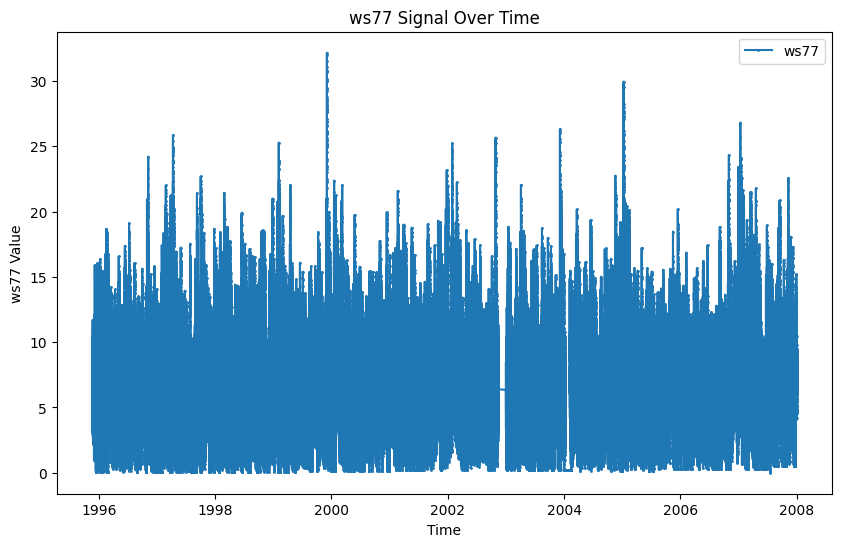

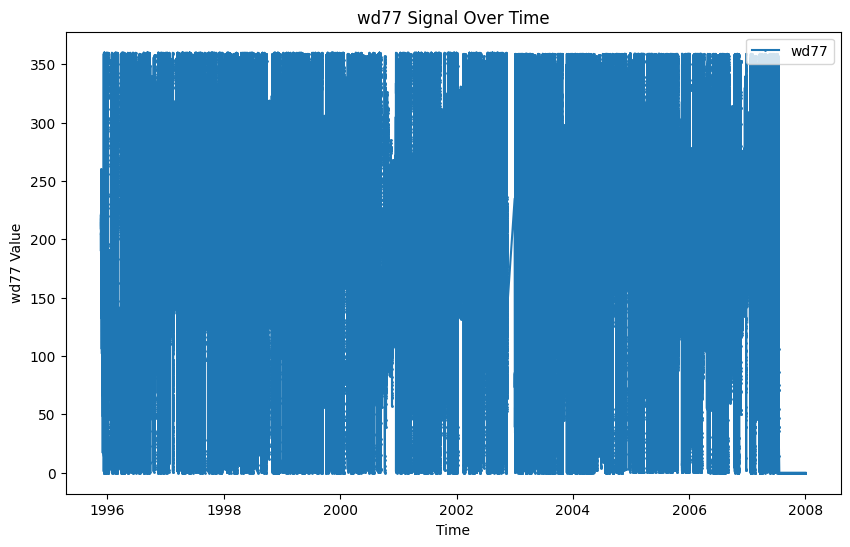

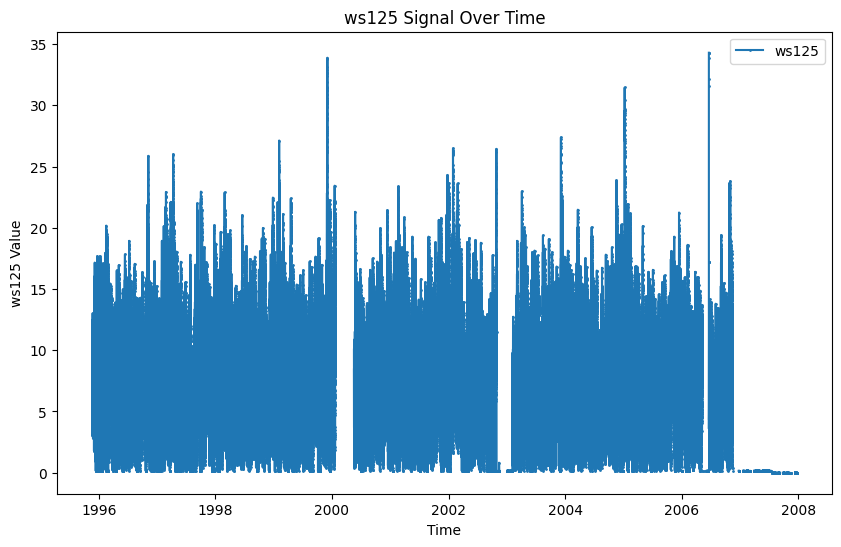

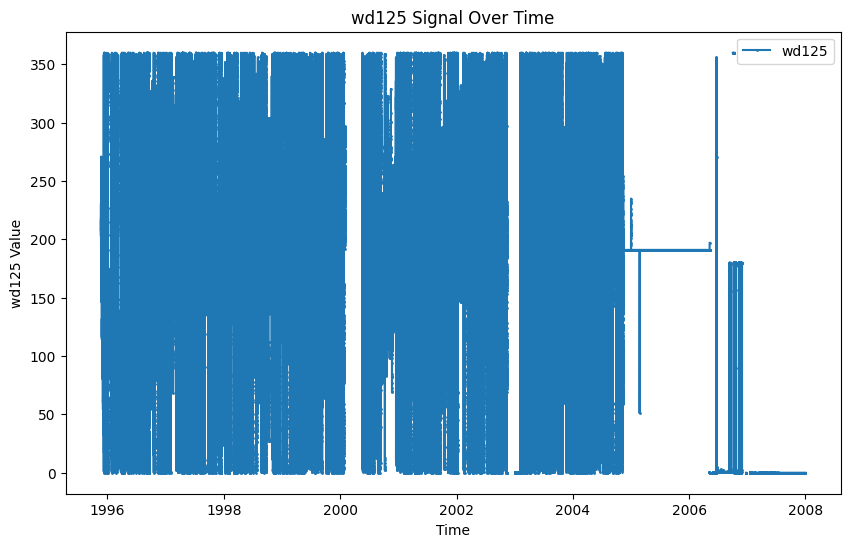

In [620]:
import netCDF4 as nc
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_path_risoe = 'Data/Risoe/risoe_m_all.nc'

# Get the Risoe dataset:
mast_risoe = nc.Dataset(file_path_risoe, 'r')
signals_risoe = ['ws77', 'wd77', 'ws125', 'wd125']
data = {}
time_var = mast_risoe.variables['time']
#signals_borglum = ['ws32', 'wd32']

base_date_risoe = datetime(1995, 11, 20, 16, 25, 0)
#base_date_borglum = datetime(1997, 12, 11, 16, 5, 0)

# Convert netCDF time to datetime
time_data = [base_date_risoe + timedelta(minutes=int(t)) for t in time_var[:]]

# Extract signal data
for signal in signals_risoe:
    if signal in mast_risoe.variables:
        data[signal] = mast_risoe.variables[signal][:]
df = pd.DataFrame({signal: np.ma.getdata(data[signal]) for signal in signals_risoe}, index=time_data)

# Plot each signal on a separate graph
for signal in signals_risoe:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[signal], label=signal, marker='o', markersize=1, linestyle='-')
    plt.xlabel('Time')
    plt.ylabel(f'{signal} Value')
    plt.title(f'{signal} Signal Over Time')
    plt.legend()
    plt.show()


#### WS77 and WD77 have less missing values so we will start with it.
#### Creating a table containing ws77 wd77 and time

In [621]:
 #Extract 'ws77' and 'wd77' signals
data = {
    "time": time_data,
    "ws77": mast_risoe.variables['ws77'][:],  
    "wd77": mast_risoe.variables['wd77'][:]
}

# Create DataFrame
df_selected = pd.DataFrame(data)

# Display the first few rows
print(df_selected.head())

# Count of rows with null values in 'ws77'
ws77_null_count = df_selected['ws77'].isnull().sum()
print(f"Rows with null values in 'ws77': {ws77_null_count}")

# Count of rows with null values in 'wd77'
wd77_null_count = df_selected['wd77'].isnull().sum()
print(f"Rows with null values in 'wd77': {wd77_null_count}")

# Count of rows where either 'ws77' or 'wd77' has a null value
either_null_count = df_selected['ws77'].isnull() | df_selected['wd77'].isnull()
print(f"Rows with null values in either 'ws77' or 'wd77': {either_null_count.sum()}")


                 time  ws77   wd77
0 1995-11-20 16:25:00  3.36  205.0
1 1995-11-20 16:35:00  3.05  205.0
2 1995-11-20 16:45:00  3.59  204.0
3 1995-11-20 16:55:00  3.87  202.0
4 1995-11-20 17:05:00  4.74  201.0
Rows with null values in 'ws77': 6752
Rows with null values in 'wd77': 548
Rows with null values in either 'ws77' or 'wd77': 7065


#### Displaying the distribution of wind direction data

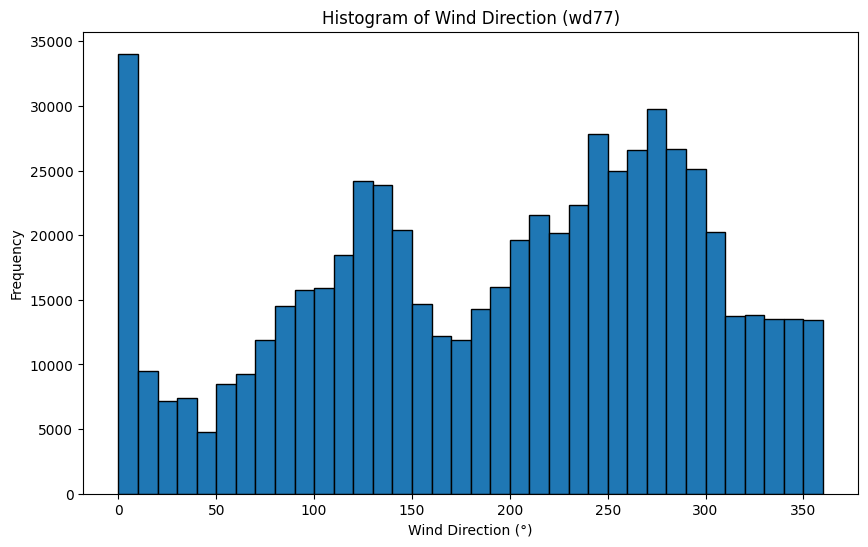

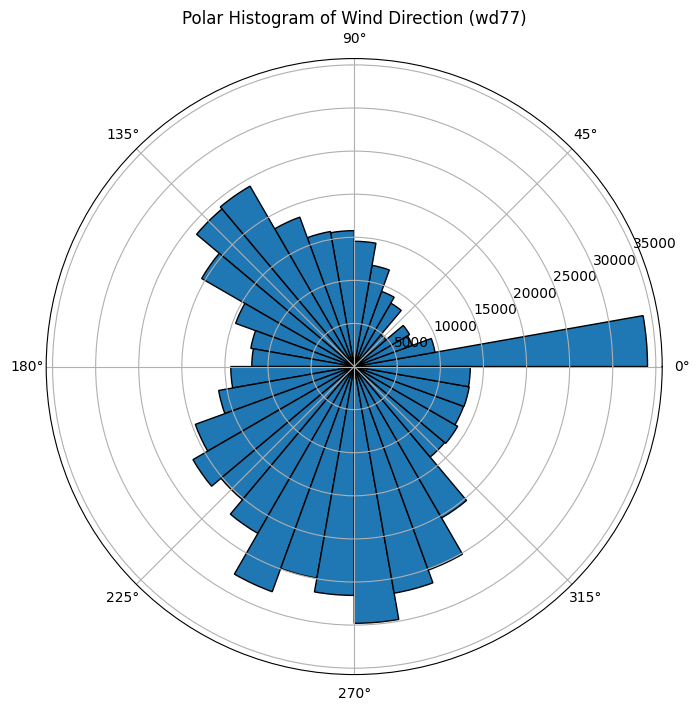

<Figure size 800x800 with 0 Axes>

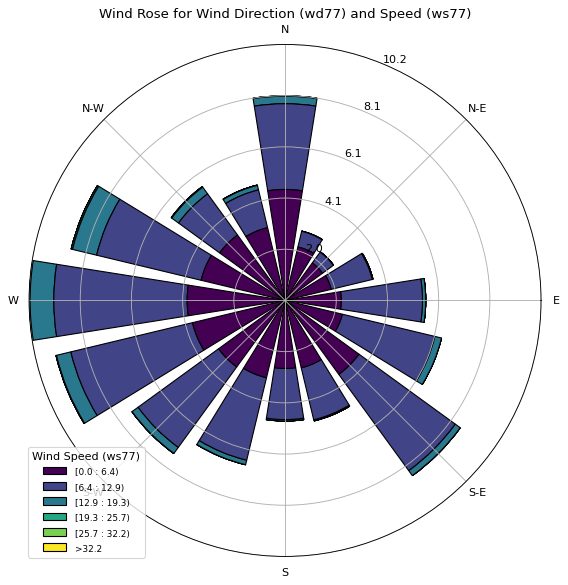

In [622]:
import matplotlib.pyplot as plt

# Plot histogram for 'wd77'
plt.figure(figsize=(10, 6))
plt.hist(df_selected['wd77'].dropna(), bins=36, edgecolor='black')  # Dropping null values
plt.xlabel('Wind Direction (°)')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Direction (wd77)')
plt.show()


import numpy as np

# Convert degrees to radians for polar plot
wind_directions = np.deg2rad(df_selected['wd77'].dropna())

plt.figure(figsize=(8, 8))
plt.subplot(projection="polar")
plt.hist(wind_directions, bins=36, edgecolor='black')
plt.title("Polar Histogram of Wind Direction (wd77)")
plt.show()


from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Drop rows where either 'ws77' or 'wd77' is null
df_filtered = df_selected.dropna(subset=['ws77', 'wd77'])

# Wind rose plot for 'wd77' (direction) and 'ws77' (speed)
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_filtered['wd77'], df_filtered['ws77'], normed=True, opening=0.8, edgecolor='black')
ax.set_legend(title="Wind Speed (ws77)")
plt.title('Wind Rose for Wind Direction (wd77) and Speed (ws77)')
plt.show()



To remove the last part of the data where the wind direction (wd77) is missing or equals 0.0 for a long period of time, you can:

Find the last valid wind direction value (where wd77 is not 0.0).
Remove all rows after this point where the wind direction is consistently 0.0.

df_selected['wd77'] != 0.0 creates a boolean mask where wd77 is not 0.0.
last_valid_index finds the last occurrence where wd77 is not zero.
df_selected.loc[:last_valid_index] slices the DataFrame, retaining all rows up to the last valid wind direction value.

In [623]:
# Find the index of the last non-zero wind direction value
last_valid_index = df_selected[df_selected['wd77'] != 0.0].index[-1]

# Slice the DataFrame to keep only the data up to the last valid index
df_trimmed = df_selected.loc[:last_valid_index]

# Display the trimmed DataFrame
print(df_trimmed)


                      time  ws77   wd77
0      1995-11-20 16:25:00  3.36  205.0
1      1995-11-20 16:35:00  3.05  205.0
2      1995-11-20 16:45:00  3.59  204.0
3      1995-11-20 16:55:00  3.87  202.0
4      1995-11-20 17:05:00  4.74  201.0
...                    ...   ...    ...
604912 2007-07-15 23:00:00  5.19   75.0
604913 2007-07-15 23:10:00  4.62  106.0
604914 2007-07-15 23:20:00  3.31   86.0
604915 2007-07-15 23:30:00  4.05   14.0
604916 2007-07-15 23:40:00  1.87   47.0

[604917 rows x 3 columns]


#### Displaying the data now that rows were removed

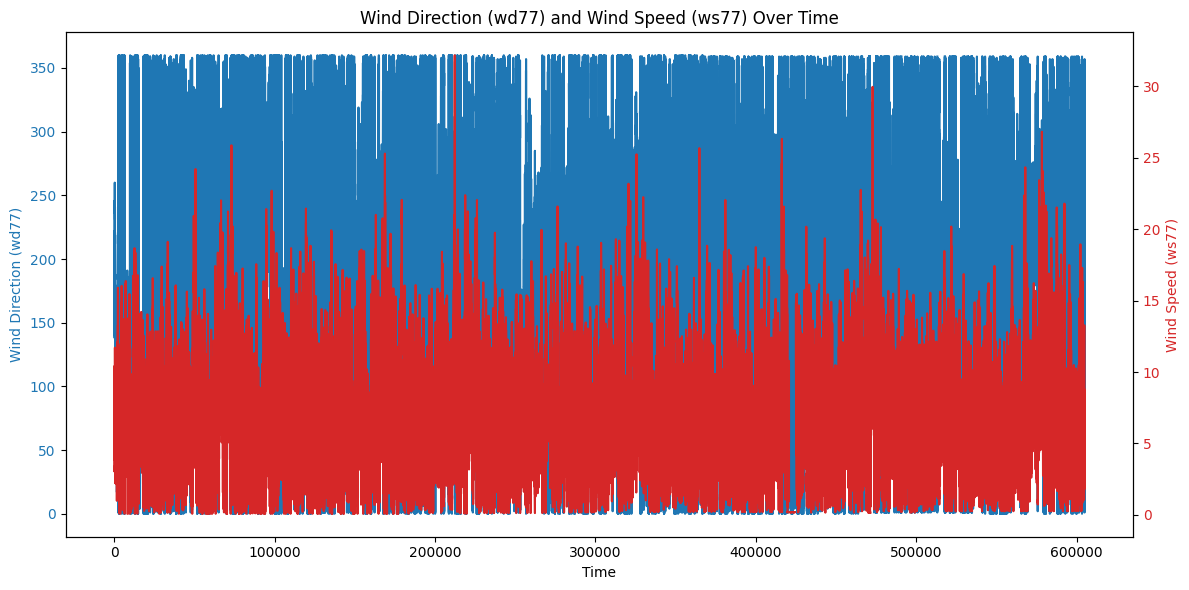

<Figure size 800x800 with 0 Axes>

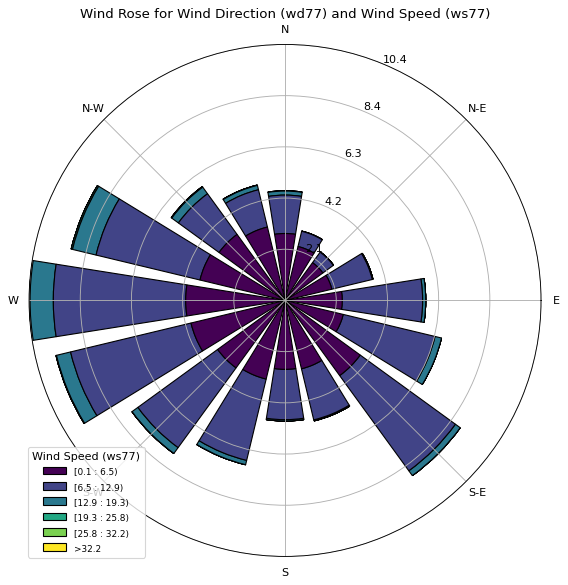

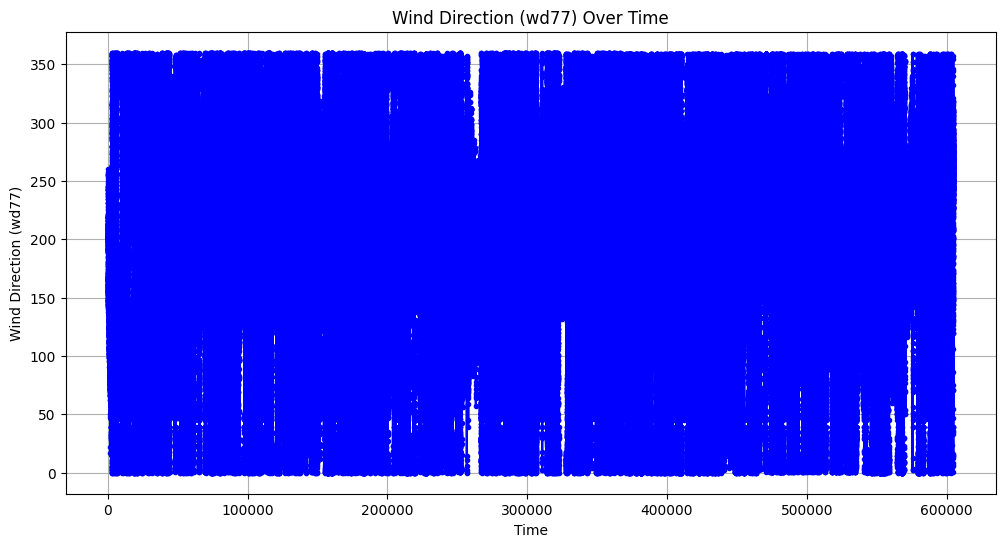

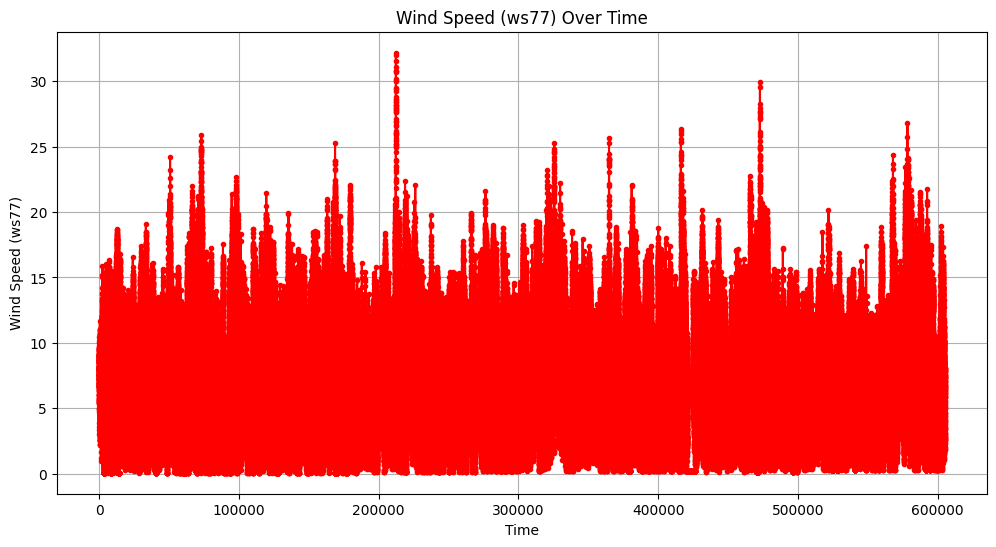

In [624]:
import matplotlib.pyplot as plt

# Plot wind direction (wd77) and wind speed (ws77) with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot wd77 (wind direction) on the left y-axis
ax1.set_xlabel('Time')
ax1.set_ylabel('Wind Direction (wd77)', color='tab:blue')
ax1.plot(df_trimmed.index, df_trimmed['wd77'], color='tab:blue', label='wd77')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot ws77 (wind speed)
ax2 = ax1.twinx()
ax2.set_ylabel('Wind Speed (ws77)', color='tab:red')
ax2.plot(df_trimmed.index, df_trimmed['ws77'], color='tab:red', label='ws77')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout adjustments
plt.title('Wind Direction (wd77) and Wind Speed (ws77) Over Time')
fig.tight_layout()
plt.show()


from windrose import WindroseAxes

# Wind rose plot for 'wd77' (wind direction) and 'ws77' (wind speed)
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_trimmed['wd77'], df_trimmed['ws77'], normed=True, opening=0.8, edgecolor='black')
ax.set_legend(title="Wind Speed (ws77)")
plt.title('Wind Rose for Wind Direction (wd77) and Wind Speed (ws77)')
plt.show()


# Plotting wd77 (wind direction)
plt.figure(figsize=(12, 6))
plt.plot(df_trimmed.index, df_trimmed['wd77'], color='blue', label='wd77', marker='o', markersize=3)
plt.xlabel('Time')
plt.ylabel('Wind Direction (wd77)')
plt.title('Wind Direction (wd77) Over Time')
plt.grid(True)
plt.show()

# Plotting ws77 (wind speed)
plt.figure(figsize=(12, 6))
plt.plot(df_trimmed.index, df_trimmed['ws77'], color='red', label='ws77', marker='o', markersize=3)
plt.xlabel('Time')
plt.ylabel('Wind Speed (ws77)')
plt.title('Wind Speed (ws77) Over Time')
plt.grid(True)
plt.show()



#### Count missing values in 'ws77' before interpolation

In [625]:
# Count of missing values in 'ws77' before interpolation
missing_before = df_trimmed['ws77'].isnull().sum()
print(f"Missing values before interpolation: {missing_before}")

Missing values before interpolation: 6752


#### Interpolate missing values in 'ws77' column using linear interpolation

C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\3649853983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['ws77'] = df_trimmed['ws77'].interpolate(method='linear')


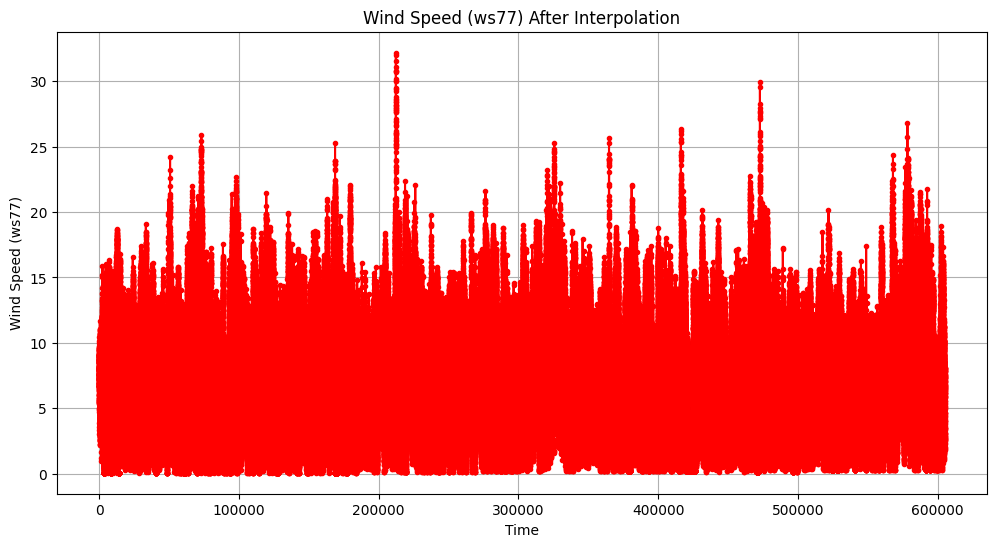

In [626]:
# Interpolate missing values in 'ws77' column using linear interpolation
df_trimmed['ws77'] = df_trimmed['ws77'].interpolate(method='linear')

# Plot after interpolation
plt.figure(figsize=(12, 6))
plt.plot(df_trimmed.index, df_trimmed['ws77'], color='red', label='ws77 (Interpolated)', marker='o', markersize=3)
plt.xlabel('Time')
plt.ylabel('Wind Speed (ws77)')
plt.title('Wind Speed (ws77) After Interpolation')
plt.grid(True)
plt.show()


#### Count of missing values in 'ws77' after interpolation

In [627]:
# Count of missing values in 'ws77' after interpolation
missing_after = df_trimmed['ws77'].isnull().sum()
print(f"Missing values after interpolation: {missing_after}")


Missing values after interpolation: 0


#### Taking a look at the outliers of ws77 and plotting the on boxplot (we decided to keep them)

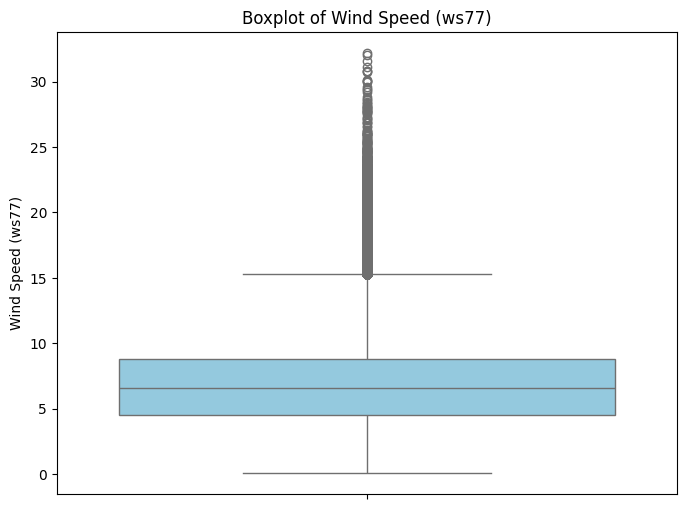

Outliers in ws77:
                      time   ws77   wd77
2340   1995-12-06 22:25:00  15.90  109.0
4652   1995-12-22 23:45:00  15.42   99.0
4655   1995-12-23 00:15:00  16.03  112.0
6844   1996-01-07 05:05:00  15.53  122.0
6852   1996-01-07 06:25:00  15.63  122.0
...                    ...    ...    ...
603869 2007-07-08 17:10:00  15.38  286.0
603870 2007-07-08 17:20:00  16.09  286.0
603872 2007-07-08 17:40:00  15.28  286.0
603874 2007-07-08 18:00:00  15.82  289.0
603876 2007-07-08 18:20:00  15.48  281.0

[9141 rows x 3 columns]


In [628]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplot for 'ws77'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_trimmed['ws77'], color='skyblue')
plt.title('Boxplot of Wind Speed (ws77)')
plt.ylabel('Wind Speed (ws77)')
plt.show()

# Detecting outliers
Q1 = df_trimmed['ws77'].quantile(0.25)  # First quartile (25%)
Q3 = df_trimmed['ws77'].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile range

# Outliers are those below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = df_trimmed[(df_trimmed['ws77'] < (Q1 - 1.5 * IQR)) | 
                      (df_trimmed['ws77'] > (Q3 + 1.5 * IQR))]

# Displaying outliers
print("Outliers in ws77:")
print(outliers)


### Interpolate 'wd77' and plot Before and After

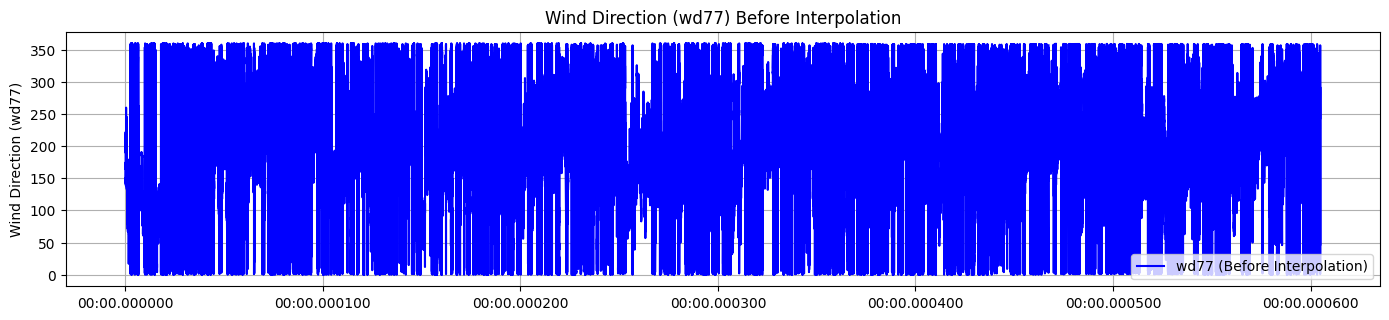

C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\2340901700.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['wd77_interpolated'] = df_trimmed['wd77'].interpolate(method='linear')


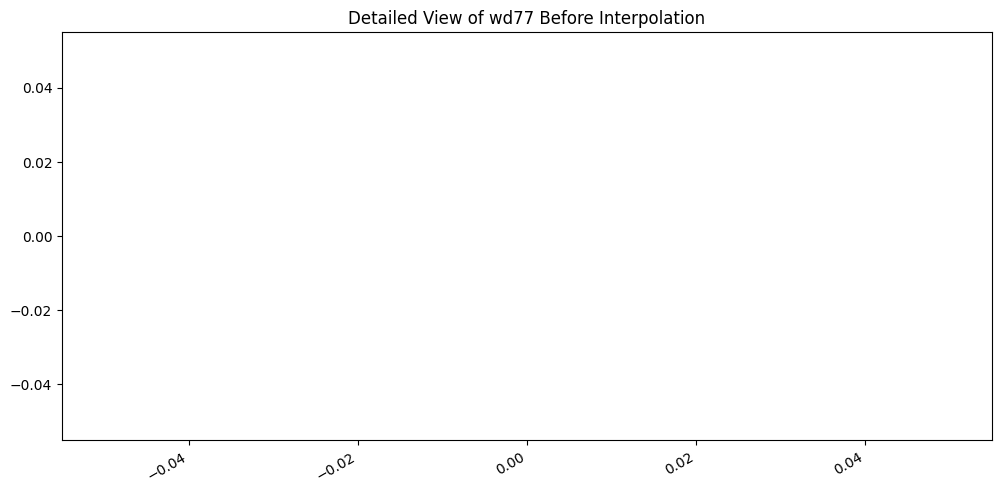

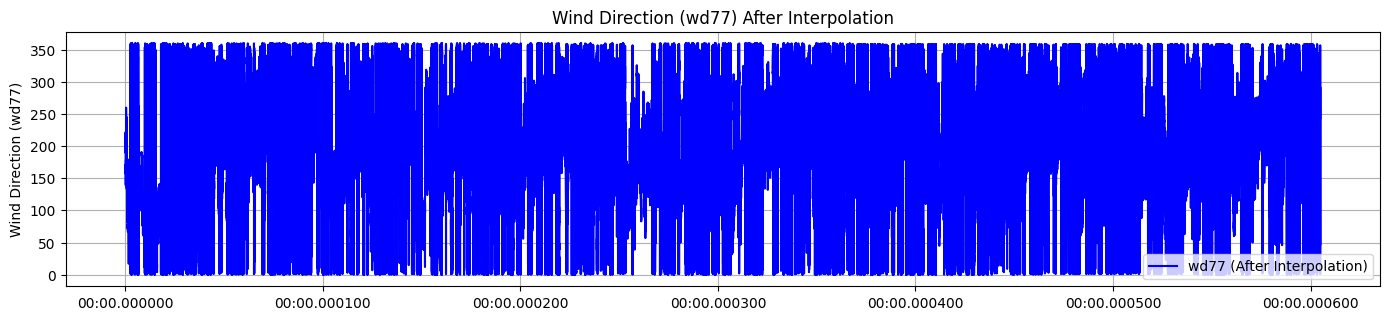

<Axes: title={'center': 'Detailed View of wd77 After Interpolation'}>

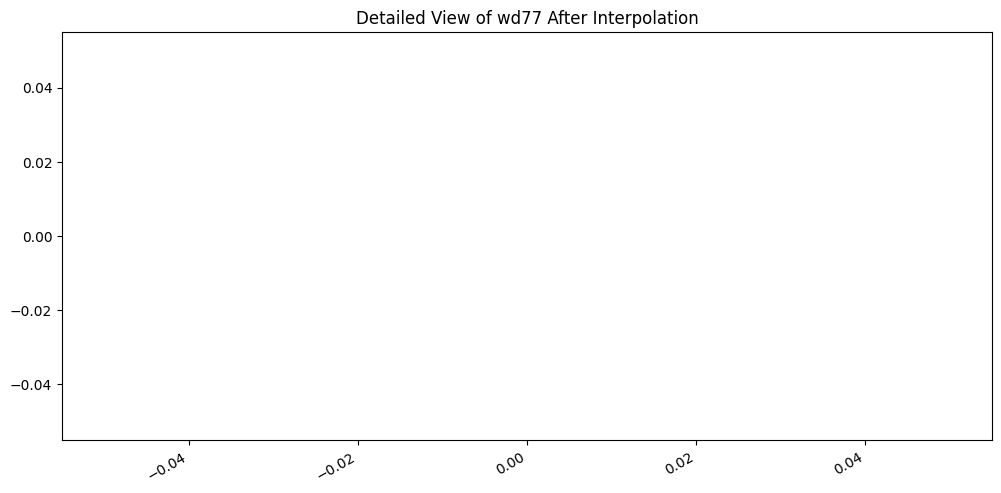

In [629]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the index of df_trimmed is in datetime format
df_trimmed.index = pd.to_datetime(df_trimmed.index, errors='coerce')

# Plot before interpolation
plt.figure(figsize=(14, 6))

# Plot wd77 before interpolation
plt.subplot(2, 1, 1)
plt.plot(df_trimmed.index, df_trimmed['wd77'], label='wd77 (Before Interpolation)', color='blue')
plt.title('Wind Direction (wd77) Before Interpolation')
plt.ylabel('Wind Direction (wd77)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Focus on a specific time range to visualize detailed data
# Ensure the time index is in datetime format
df_trimmed['wd77']['2006-02-27 05:00':'2006-02-27 09:00'].plot(
    figsize=(12, 6), title='Detailed View of wd77 Before Interpolation'
)

# Interpolating missing values for wd77
df_trimmed['wd77_interpolated'] = df_trimmed['wd77'].interpolate(method='linear')

# Plot after interpolation
plt.figure(figsize=(14, 6))

# Plot wd77 after interpolation
plt.subplot(2, 1, 1)
plt.plot(df_trimmed.index, df_trimmed['wd77_interpolated'], label='wd77 (After Interpolation)', color='blue')
plt.title('Wind Direction (wd77) After Interpolation')
plt.ylabel('Wind Direction (wd77)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Focus on a specific time range after interpolation
df_trimmed['wd77_interpolated']['2006-02-27 05:00':'2006-02-27 09:00'].plot(
    figsize=(12, 6), title='Detailed View of wd77 After Interpolation'
)




#### Data Scaling for Linear Regression
To scale your data using a Min-Max Scaler before applying linear regression, you can use MinMaxScaler from scikit-learn. This scaler will transform your features into a specified range, typically [0, 1], while preserving the distribution of the data and retaining outliers.

Steps to Scale Data Using Min-Max Scaler:
Import the required library.
Fit and transform the data using MinMaxScaler.
Transform the features you plan to use in linear regression.
Use the scaled data for training the linear regression model.

In [630]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Example data - replace this with your actual DataFrame
# Assuming 'df_trimmed' contains 'ws77' and 'wd77' as features for the linear regression
features = ['ws77', 'wd77_interpolated']  # Use the interpolated columns
target = 'target_column'  # Replace with your target variable for linear regression

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the feature data and transform it
df_trimmed[features] = scaler.fit_transform(df_trimmed[features])

# Display the first few rows of the scaled data
print("Scaled Data:")
print(df_trimmed[features].head())


Scaled Data:
                                   ws77  wd77_interpolated
1970-01-01 00:00:00.000000000  0.102213           0.569444
1970-01-01 00:00:00.000000001  0.092552           0.569444
1970-01-01 00:00:00.000000002  0.109380           0.566667
1970-01-01 00:00:00.000000003  0.118105           0.561111
1970-01-01 00:00:00.000000004  0.145217           0.558333


C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\1438952310.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[features] = scaler.fit_transform(df_trimmed[features])


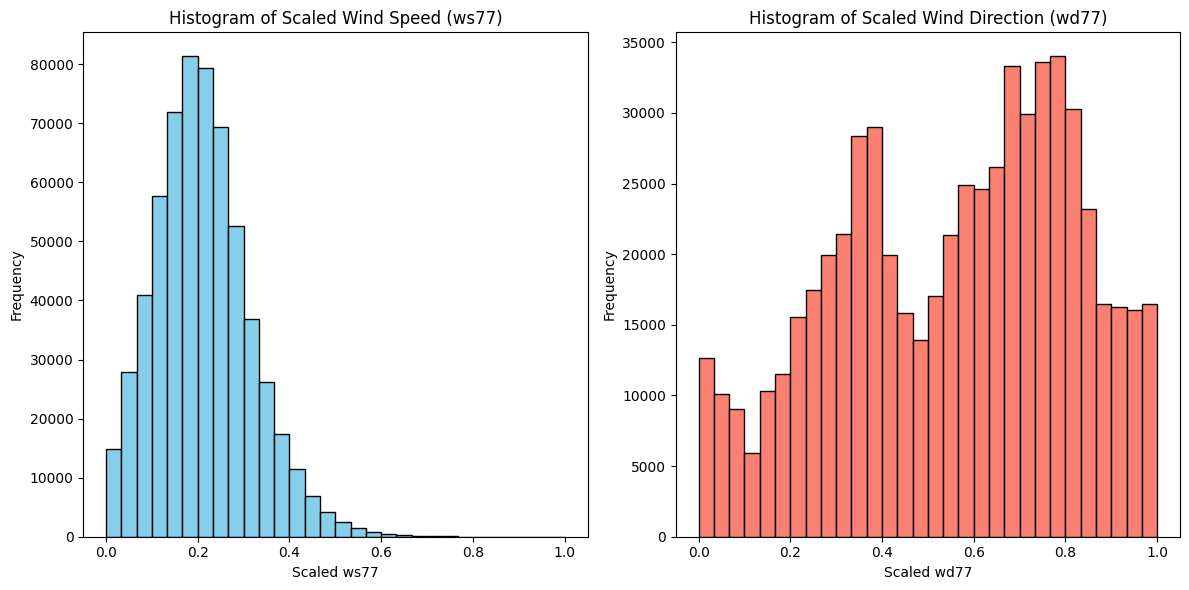

In [631]:
import matplotlib.pyplot as plt

# Plot histograms for scaled 'ws77' and 'wd77_interpolated'
plt.figure(figsize=(12, 6))

# Histogram for 'ws77'
plt.subplot(1, 2, 1)
plt.hist(df_trimmed['ws77'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Scaled Wind Speed (ws77)')
plt.xlabel('Scaled ws77')
plt.ylabel('Frequency')

# Histogram for 'wd77_interpolated'
plt.subplot(1, 2, 2)
plt.hist(df_trimmed['wd77_interpolated'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Scaled Wind Direction (wd77)')
plt.xlabel('Scaled wd77')
plt.ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Adjusting Time by Removing 2 Hours
Assuming that the time data is the index of your df_trimmed DataFrame, you can shift all the times back by 2 hours using pd.Timedelta
#### NOTE: RUN ENTIRE PYTHON NOTEBOOK; NEVER RUN THIS CELL SEPARATELY (it will substract 2h everytime its ran)

In [632]:

# If 'time' is a column rather than the index, adjust it directly
df_trimmed['time'] = df_trimmed['time'] - pd.Timedelta(hours=2)

# Display the first few rows to verify the adjustment, including 'ws77' and 'wd77'
print("Adjusted time, ws77, and wd77 data:")
print(df_trimmed[['time', 'ws77', 'wd77_interpolated']].head())




Adjusted time, ws77, and wd77 data:
                                             time      ws77  wd77_interpolated
1970-01-01 00:00:00.000000000 1995-11-20 14:25:00  0.102213           0.569444
1970-01-01 00:00:00.000000001 1995-11-20 14:35:00  0.092552           0.569444
1970-01-01 00:00:00.000000002 1995-11-20 14:45:00  0.109380           0.566667
1970-01-01 00:00:00.000000003 1995-11-20 14:55:00  0.118105           0.561111
1970-01-01 00:00:00.000000004 1995-11-20 15:05:00  0.145217           0.558333


C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\1628320152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['time'] = df_trimmed['time'] - pd.Timedelta(hours=2)


### Resample 'ws77' into 1-Hour Intervals
Steps to Resample ws77 into 1-Hour Intervals:
Ensure time is set as the DataFrame index: The resample method works on datetime indices.
Resample ws77 to 1-hour intervals: Use the resample function with a rule of '1H' to get 1-hour intervals.

In [633]:
# Make sure 'time' is set as the index if it's not already
df_trimmed.set_index('time', inplace=True)

# Resample 'ws77' to 1-hour intervals, using mean to aggregate values
df_resampled = df_trimmed['ws77'].resample('1h').mean()

# Convert the resampled data back into a DataFrame if needed
df_resampled = df_resampled.to_frame(name='ws77_1H_mean')

# Display the first few rows of the resampled data
print("Resampled ws77 to 1-hour intervals:")
print(df_resampled.head())


Resampled ws77 to 1-hour intervals:
                     ws77_1H_mean
time                             
1995-11-20 14:00:00      0.105562
1995-11-20 15:00:00      0.160071
1995-11-20 16:00:00      0.193466
1995-11-20 17:00:00      0.225512
1995-11-20 18:00:00      0.245040


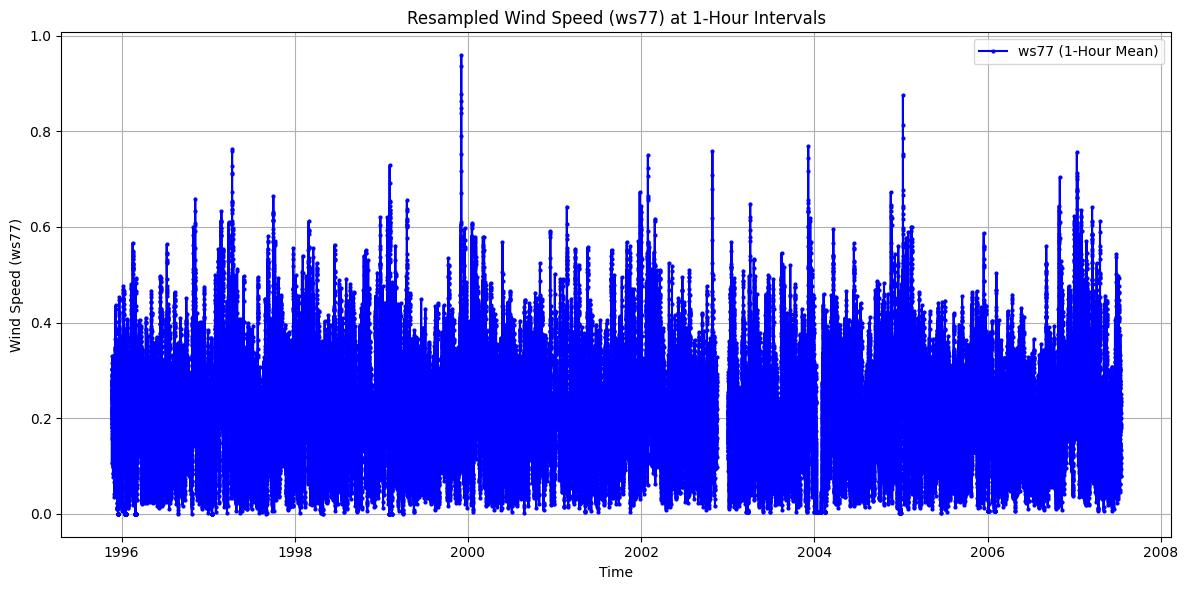

In [634]:

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled, label='ws77 (1-Hour Mean)', color='blue', linestyle='-', marker='o', markersize=2)
plt.title('Resampled Wind Speed (ws77) at 1-Hour Intervals')
plt.xlabel('Time')
plt.ylabel('Wind Speed (ws77)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Resample 'wd77' into 1-Hour intervals
To properly resample wind direction (wd77), we need to account for its circular nature. Simply taking the mean of angles can lead to incorrect results, especially when angles wrap around (e.g., 359° and 1° average to 0°, not 180°).

Approach:
Convert Wind Direction to Sine and Cosine Components:
Convert each wind direction angle to its sine and cosine values.
Calculate the mean of these sine and cosine values over the desired time interval (e.g., 1 hour).
Calculate the Resampled Wind Direction:
Use the atan2 function to convert the mean sine and cosine back into an angle (wind direction).
Visualize the Resampled Wind Direction:
Plot the resampled wind direction to see how it changes over time.

C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\2087214067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['wd77_rad'] = np.deg2rad(df_trimmed['wd77_interpolated'])
C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\2087214067.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['sin_wd77'] = np.sin(df_trimmed['wd77_rad'])
C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\2087214067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

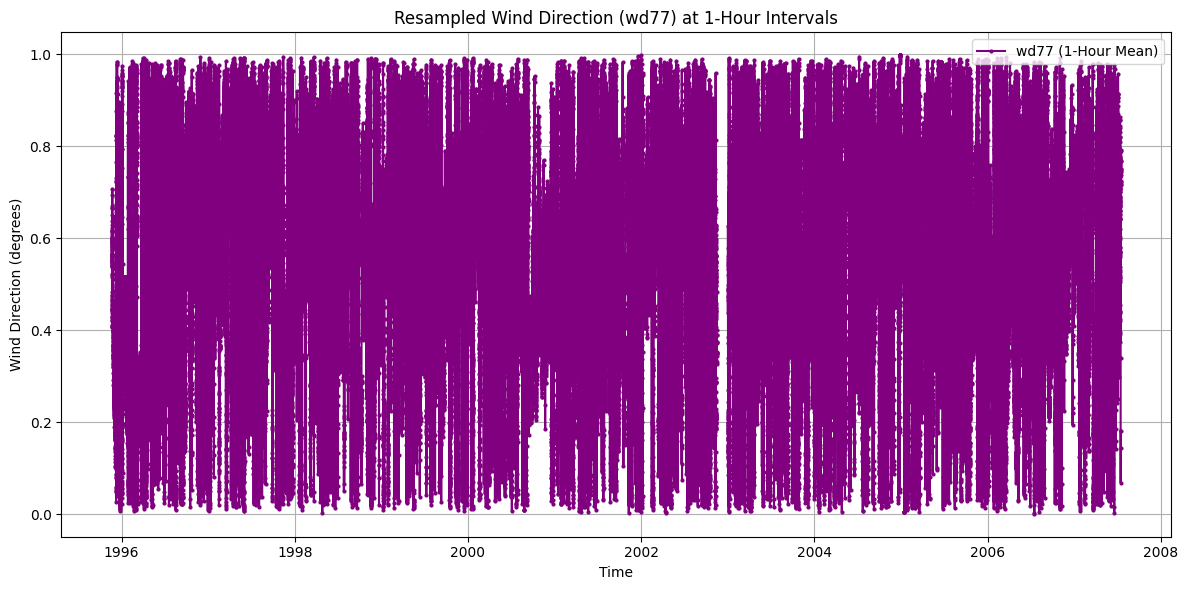

In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert wind direction to radians
df_trimmed['wd77_rad'] = np.deg2rad(df_trimmed['wd77_interpolated'])

# Calculate the sine and cosine of the wind direction
df_trimmed['sin_wd77'] = np.sin(df_trimmed['wd77_rad'])
df_trimmed['cos_wd77'] = np.cos(df_trimmed['wd77_rad'])

# Resample sine and cosine components to 1-hour intervals
sin_resampled = df_trimmed['sin_wd77'].resample('1h').mean()
cos_resampled = df_trimmed['cos_wd77'].resample('1h').mean()

# Calculate the mean wind direction from the resampled sine and cosine values
mean_wd77_rad = np.arctan2(sin_resampled, cos_resampled)
mean_wd77_deg = np.rad2deg(mean_wd77_rad)

# Normalize the angle to the range [0, 360]
mean_wd77_deg = (mean_wd77_deg + 360) % 360

# Create a DataFrame for the resampled wind direction
df_wd_resampled = pd.DataFrame(mean_wd77_deg, columns=['wd77_1H_mean'])

# Add the wind speed data to the same DataFrame
df_resampled['wd77_1H_mean'] = df_wd_resampled['wd77_1H_mean'].values

# Plot the resampled wind direction
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['wd77_1H_mean'], label='wd77 (1-Hour Mean)', color='purple', linestyle='-', marker='o', markersize=2)
plt.title('Resampled Wind Direction (wd77) at 1-Hour Intervals')
plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [636]:
# Display the first few rows of the resampled wind direction DataFrame
print("Resampled Wind Direction (wd77) at 1-Hour Intervals:")
print(df_resampled['wd77_1H_mean'].head())


Resampled Wind Direction (wd77) at 1-Hour Intervals:
time
1995-11-20 14:00:00    0.566667
1995-11-20 15:00:00    0.558333
1995-11-20 16:00:00    0.563426
1995-11-20 17:00:00    0.556019
1995-11-20 18:00:00    0.548611
Freq: h, Name: wd77_1H_mean, dtype: float64


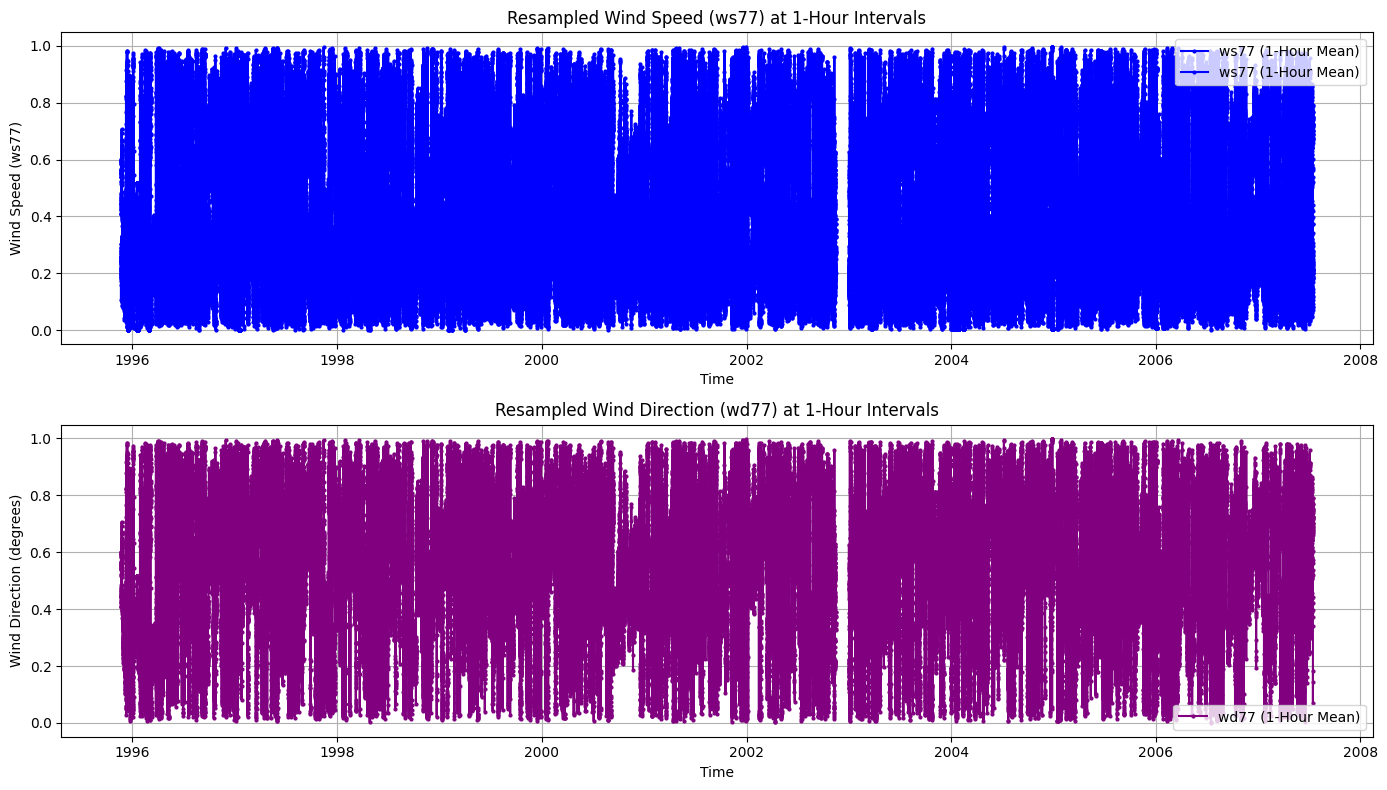

In [637]:
import matplotlib.pyplot as plt

# Plotting the resampled wind speed and wind direction together
plt.figure(figsize=(14, 8))

# Plot the resampled wind speed (ws77)
plt.subplot(2, 1, 1)
plt.plot(df_resampled.index, df_resampled, label='ws77 (1-Hour Mean)', color='blue', linestyle='-', marker='o', markersize=2)
plt.title('Resampled Wind Speed (ws77) at 1-Hour Intervals')
plt.xlabel('Time')
plt.ylabel('Wind Speed (ws77)')
plt.grid(True)
plt.legend()

# Plot the resampled wind direction (wd77)
plt.subplot(2, 1, 2)
plt.plot(df_resampled.index, df_resampled['wd77_1H_mean'], label='wd77 (1-Hour Mean)', color='purple', linestyle='-', marker='o', markersize=2)
plt.title('Resampled Wind Direction (wd77) at 1-Hour Intervals')
plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.grid(True)
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [638]:
# Check for null values in the resampled wind speed (ws77)
ws77_null_count = df_resampled['ws77_1H_mean'].isnull().sum()
print(f"Number of null values in resampled ws77: {ws77_null_count}")

# Check for null values in the resampled wind direction (wd77)
wd77_null_count = df_resampled['wd77_1H_mean'].isnull().sum()
print(f"Number of null values in resampled wd77: {wd77_null_count}")


Number of null values in resampled ws77: 1301
Number of null values in resampled wd77: 1301


#### Possible Reasons for Null Values After Resampling:
Gaps in the Time Series: <br> If there are time periods in your original dataset where no data exists (e.g., entire days or hours missing), resampling might create intervals that have no corresponding data, resulting in new null values. <br>
Data Interpolation Only Filling Existing Gaps: <br> When we interpolate, we fill gaps where data points exist on either side. But if there's a time range with no data at all (e.g., due to sensor downtime), those gaps can remain after resampling.

In [639]:
# Use .ffill() and .bfill() directly to avoid the deprecation warning
df_resampled['ws77_1H_mean'] = df_resampled['ws77_1H_mean'].ffill().bfill()

# For the wind direction column, explicitly assign the result back
df_resampled['wd77_1H_mean'] = df_resampled['wd77_1H_mean'].ffill().bfill()

# Display the number of null values to confirm they are handled
ws77_null_count = df_resampled['ws77_1H_mean'].isnull().sum()
wd77_null_count = df_resampled['wd77_1H_mean'].isnull().sum()

print(f"Number of null values in resampled ws77 after filling: {ws77_null_count}")
print(f"Number of null values in resampled wd77 after filling: {wd77_null_count}")


Number of null values in resampled ws77 after filling: 0
Number of null values in resampled wd77 after filling: 0


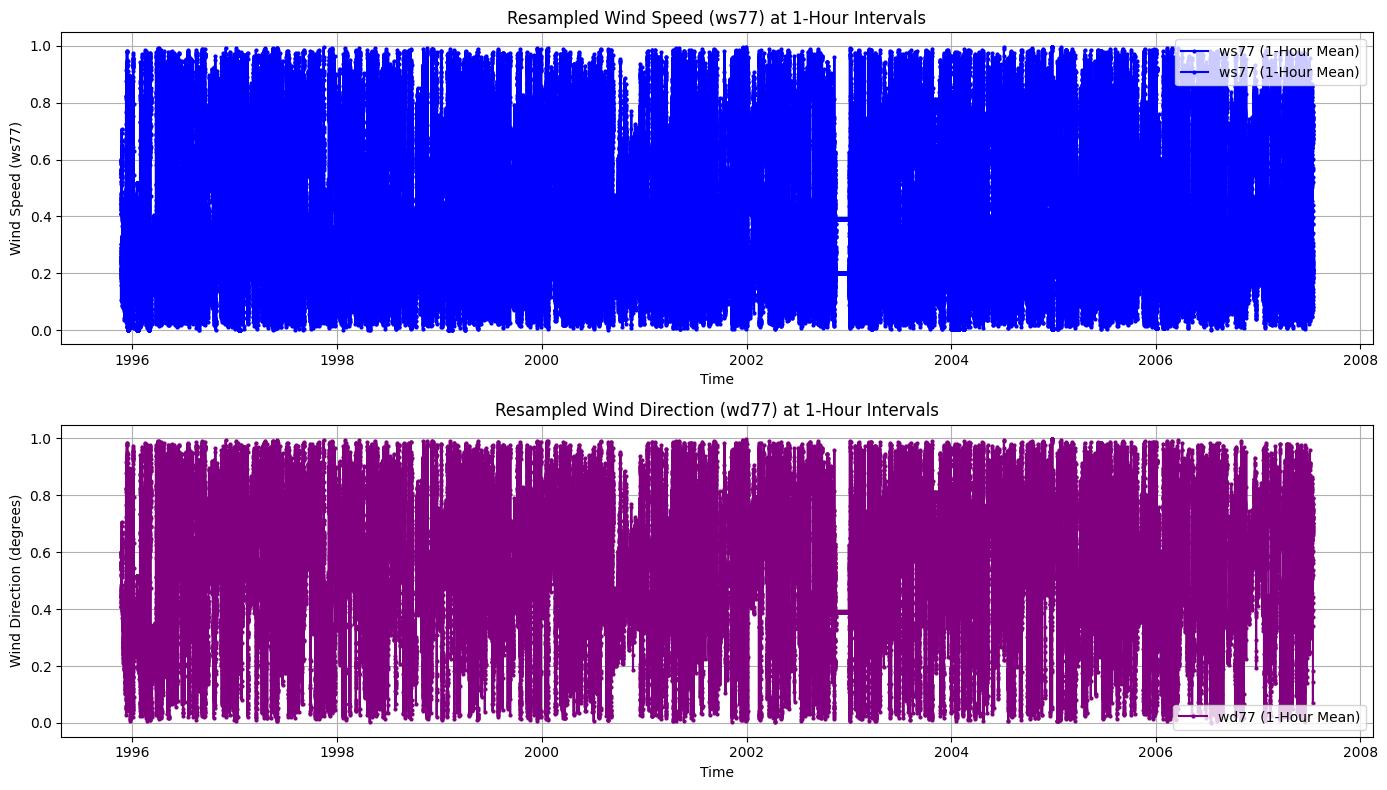

In [640]:
import matplotlib.pyplot as plt

# Plotting the resampled wind speed and wind direction together
plt.figure(figsize=(14, 8))

# Plot the resampled wind speed (ws77)
plt.subplot(2, 1, 1)
plt.plot(df_resampled['ws77_1H_mean'].index, df_resampled, label='ws77 (1-Hour Mean)', color='blue', linestyle='-', marker='o', markersize=2)
plt.title('Resampled Wind Speed (ws77) at 1-Hour Intervals')
plt.xlabel('Time')
plt.ylabel('Wind Speed (ws77)')
plt.grid(True)
plt.legend()

# Plot the resampled wind direction (wd77)
plt.subplot(2, 1, 2)
plt.plot(df_resampled['wd77_1H_mean'].index, df_resampled['wd77_1H_mean'], label='wd77 (1-Hour Mean)', color='purple', linestyle='-', marker='o', markersize=2)
plt.title('Resampled Wind Direction (wd77) at 1-Hour Intervals')
plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.grid(True)
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


## Load MESO data

In [641]:
import pandas as pd

# Load the meso_Risoe.csv file to begin with the data analysis and preprocessing
meso_risoe_file_path = 'Data/Risoe/meso_Risoe.csv'

# Load the meso dataset with only relevant columns
meso_data = pd.read_csv(meso_risoe_file_path, usecols=['TIMESTAMP', 'WSP060', 'WSP080', 'WDIR060', 'WDIR080'], parse_dates=['TIMESTAMP'], index_col='TIMESTAMP')

# Display basic information and the first few rows of the dataset
meso_data.sort_index(inplace=True)

meso_data.head()

,WSP060,WSP080,WDIR060,WDIR080
TIMESTAMP,,,,
2000-01-01 07:00:00,5.40,5.83,208.02,209.09
2000-01-01 08:00:00,5.67,6.13,203.13,204.21
2000-01-01 09:00:00,6.12,6.69,203.82,204.75
2000-01-01 10:00:00,5.84,6.37,210.63,211.50
2000-01-01 11:00:00,5.56,6.20,216.27,217.37


## Find overlapping time period between MAST and MESO

To slice the data to only include the overlapping time period between the mast data and meso data, we need to determine the common time range and then filter each dataset to that range.

Steps to Slice Data:
Find the Overlapping Time Range:
Determine the start and end dates that are common to both datasets.
Slice the Data:
Use these dates to filter both the mast and meso datasets to the overlapping time range.

In [642]:
# Slice MESO data to only include until the last index of resampled_scaled_mast_risoe
last_index = df_resampled.index[-1]
meso_data_overlapping = meso_data[:str(last_index)]

# See if the first timestamps align with MAST data
meso_data_overlapping.head()


,WSP060,WSP080,WDIR060,WDIR080
TIMESTAMP,,,,
2000-01-01 07:00:00,5.40,5.83,208.02,209.09
2000-01-01 08:00:00,5.67,6.13,203.13,204.21
2000-01-01 09:00:00,6.12,6.69,203.82,204.75
2000-01-01 10:00:00,5.84,6.37,210.63,211.50
2000-01-01 11:00:00,5.56,6.20,216.27,217.37


In [643]:
# Slice MAST data to only include from the first index of meso_data
mast_data_overlapping = df_resampled[meso_data.index[0]:]

# See if the first timestamps align with MESO data
mast_data_overlapping.head()


,ws77_1H_mean,wd77_1H_mean
time,,
2000-01-01 07:00:00,0.190817,0.539352
2000-01-01 08:00:00,0.206347,0.561111
2000-01-01 09:00:00,0.219383,0.545833
2000-01-01 10:00:00,0.201361,0.558333
2000-01-01 11:00:00,0.212268,0.555093


#### Plot the overlapping MESO and MAST data

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

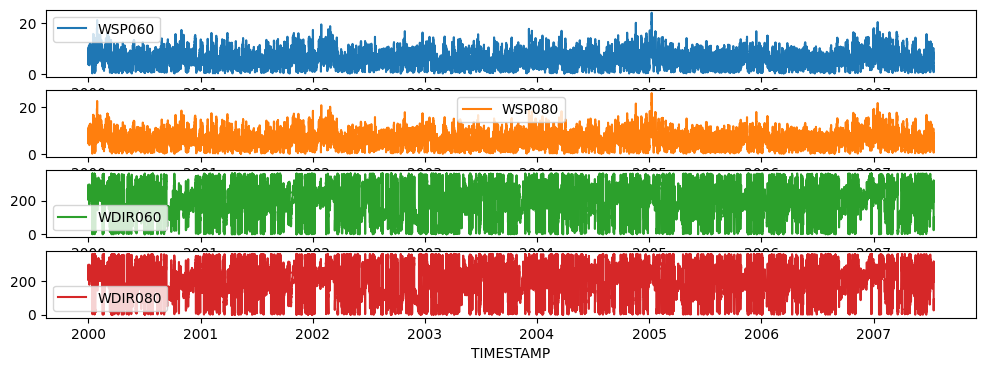

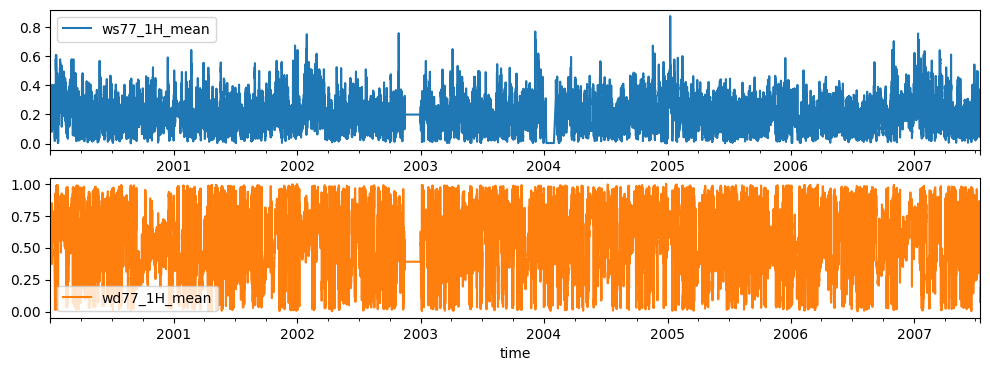

In [644]:
# MESO data
meso_data_overlapping.plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

# MAST data
mast_data_overlapping.plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

# Interpolate the MESO wind direction

To interpolate the wind direction at a height of 77 meters from the overlapping time period between the mast and meso data, you can follow these steps:

Approach:
Ensure Data Overlap: Use the overlapping time-sliced data between the mast and meso datasets.
Use Linear Interpolation for Heights: If the WDIR060 (60m) and WDIR080 (80m) columns are available, you can interpolate to estimate the wind direction at 77 meters.
Use the interp1d Function from scipy: This function allows for linear interpolation between known values

In [645]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Assume `meso_data_overlapping` is the DataFrame containing the overlapping meso data with 'WDIR060' and 'WDIR080'

# Define the heights and corresponding wind directions for interpolation
heights = [60, 80]  # Known heights in meters
meso_data_overlapping['wdir060_rad'] = np.deg2rad(meso_data_overlapping['WDIR060'])
meso_data_overlapping['wdir080_rad'] = np.deg2rad(meso_data_overlapping['WDIR080'])

# Interpolate the sine and cosine of the wind directions at 77 meters
sin_interp = interp1d(
    heights,
    np.vstack((np.sin(meso_data_overlapping['wdir060_rad']), np.sin(meso_data_overlapping['wdir080_rad']))),
    axis=0,
    fill_value='extrapolate'
)

cos_interp = interp1d(
    heights,
    np.vstack((np.cos(meso_data_overlapping['wdir060_rad']), np.cos(meso_data_overlapping['wdir080_rad']))),
    axis=0,
    fill_value='extrapolate'
)

# Calculate the interpolated sine and cosine at height 77 meters
meso_data_overlapping['sin_wdir_77'] = sin_interp(77)
meso_data_overlapping['cos_wdir_77'] = cos_interp(77)

# np.arctan2(y,x) computes the angle based on 2 coordinates y,x, returning the angle in the correct quadrant(the arctan is the inverse function of the tangent function)
# Compute the interpolated wind direction at 77 meters in radians and then convert back to degrees
meso_data_overlapping['wdir_77_rad'] = np.arctan2(meso_data_overlapping['sin_wdir_77'], meso_data_overlapping['cos_wdir_77'])
meso_data_overlapping['WDIR_77'] = np.rad2deg(meso_data_overlapping['wdir_77_rad'])

# Normalize the direction to the range [0, 360]
meso_data_overlapping['WDIR_77'] = (meso_data_overlapping['WDIR_77'] + 360) % 360

# Display the first few rows of the interpolated wind direction at 77 meters
print("Interpolated Wind Direction at 77 meters (WDIR_77):")
print(meso_data_overlapping[['WDIR_77']].head())


Interpolated Wind Direction at 77 meters (WDIR_77):
                        WDIR_77
TIMESTAMP                      
2000-01-01 07:00:00  208.929506
2000-01-01 08:00:00  204.048006
2000-01-01 09:00:00  204.610504
2000-01-01 10:00:00  211.369503
2000-01-01 11:00:00  217.205006


C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\2592666396.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meso_data_overlapping['wdir060_rad'] = np.deg2rad(meso_data_overlapping['WDIR060'])
C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\2592666396.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meso_data_overlapping['wdir080_rad'] = np.deg2rad(meso_data_overlapping['WDIR080'])
C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\2592666396.py:28: SettingWithCopyWarning: 
A value is trying to be 

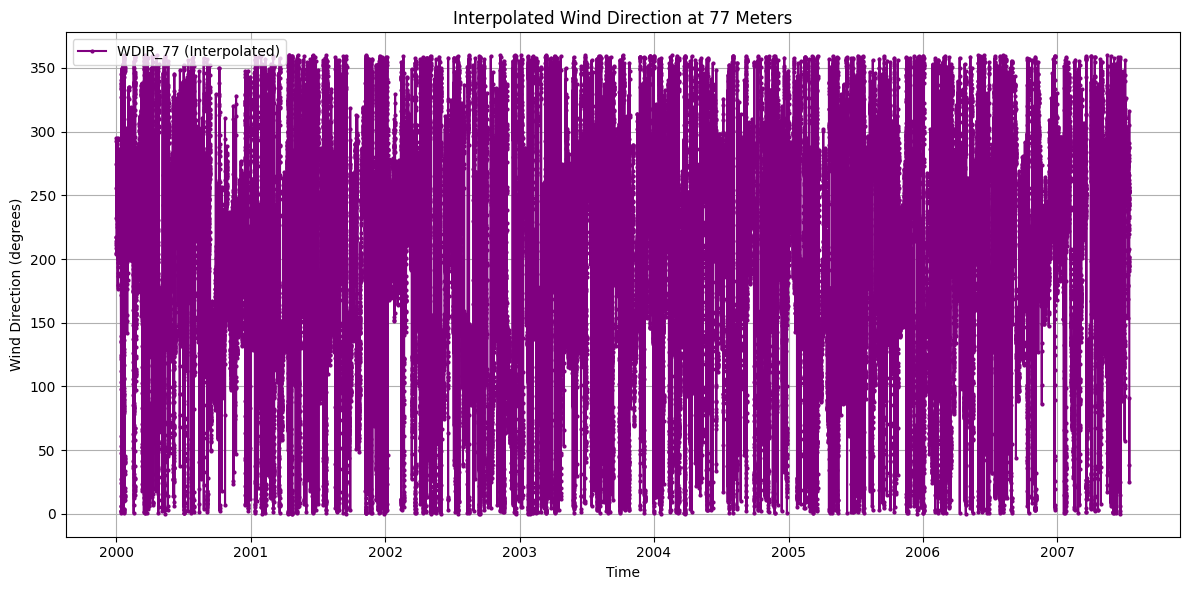

In [646]:
import matplotlib.pyplot as plt

# Plot the interpolated wind direction at 77 meters over time
plt.figure(figsize=(12, 6))
plt.plot(meso_data_overlapping.index, meso_data_overlapping['WDIR_77'], label='WDIR_77 (Interpolated)', color='purple', linestyle='-', marker='o', markersize=2)
plt.title('Interpolated Wind Direction at 77 Meters')
plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\408848037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meso_data_overlapping['diff_WDIR060_WDIR080'] = meso_data_overlapping['WDIR060'] - meso_data_overlapping['WDIR080']
C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\408848037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meso_data_overlapping['diff_WDIR077_WDIR080'] = meso_data_overlapping['WDIR_77'] - meso_data_overlapping['WDIR080']


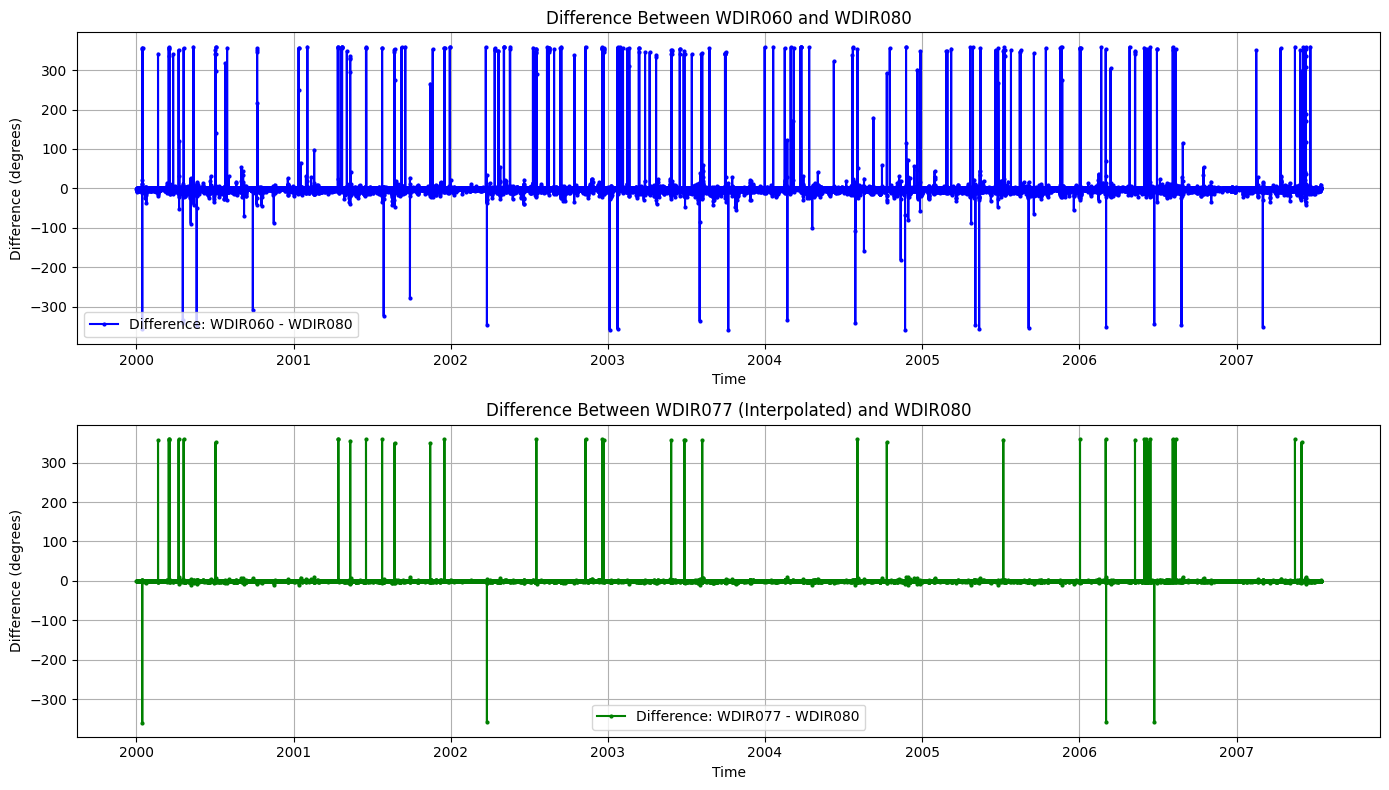

In [647]:
import matplotlib.pyplot as plt

# Calculate the differences between the wind directions
meso_data_overlapping['diff_WDIR060_WDIR080'] = meso_data_overlapping['WDIR060'] - meso_data_overlapping['WDIR080']
meso_data_overlapping['diff_WDIR077_WDIR080'] = meso_data_overlapping['WDIR_77'] - meso_data_overlapping['WDIR080']

# Plot the differences
plt.figure(figsize=(14, 8))

# Plot the difference between WDIR060 and WDIR080
plt.subplot(2, 1, 1)
plt.plot(meso_data_overlapping.index, meso_data_overlapping['diff_WDIR060_WDIR080'], label='Difference: WDIR060 - WDIR080', color='blue', linestyle='-', marker='o', markersize=2)
plt.title('Difference Between WDIR060 and WDIR080')
plt.xlabel('Time')
plt.ylabel('Difference (degrees)')
plt.grid(True)
plt.legend()

# Plot the difference between WDIR077 and WDIR080
plt.subplot(2, 1, 2)
plt.plot(meso_data_overlapping.index, meso_data_overlapping['diff_WDIR077_WDIR080'], label='Difference: WDIR077 - WDIR080', color='green', linestyle='-', marker='o', markersize=2)
plt.title('Difference Between WDIR077 (Interpolated) and WDIR080')
plt.xlabel('Time')
plt.ylabel('Difference (degrees)')
plt.grid(True)
plt.legend()

# Adjust layout for better display
plt.tight_layout()
plt.show()


### Check for correlations between the mast and meso data
#### Steps:
Align and Merge Data: Ensure that the overlapping periods of the mast and meso data are aligned based on the timestamps, and then join them into a single DataFrame.
<br>Check for Correlation: Use the corr() method in pandas to compute the correlation matrix between the different columns.
<br>Interpret the Correlation: Understand the relationship between the variables, with a focus on values close to +1 (positive correlation) or -1 (negative correlation).

#### Plot 'WSP080' and interpolated 'WDIR_77' from MESO 

C:\Users\Petra\AppData\Local\Temp\ipykernel_27720\2652957840.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meso_data_selected.dropna(inplace=True)


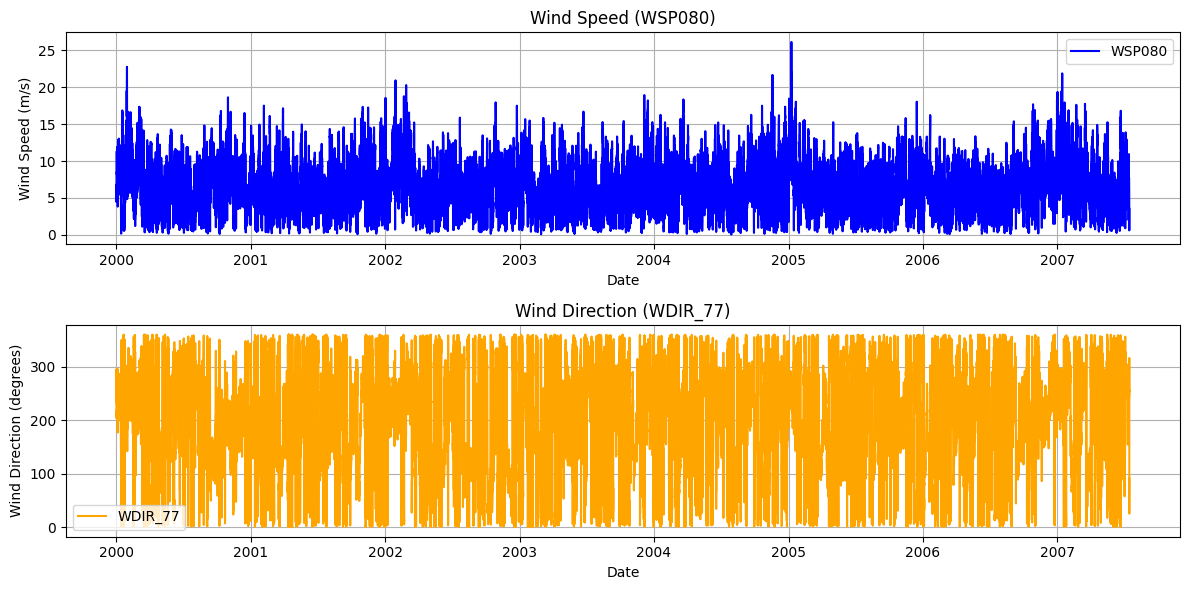

In [648]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the index of meso_data_overlapping contains datetime information
meso_data_overlapping.index = pd.to_datetime(meso_data_overlapping.index, errors='coerce')

# Select the relevant columns
selected_columns = ['WSP080', 'WDIR_77']
meso_data_selected = meso_data_overlapping[selected_columns]

# Drop rows with any missing values
meso_data_selected.dropna(inplace=True)

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot for WSP080
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(meso_data_overlapping.index, meso_data_selected['WSP080'], color='blue', label='WSP080')
plt.title('Wind Speed (WSP080)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.legend()

# Plot for WDIR_77
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(meso_data_overlapping.index, meso_data_selected['WDIR_77'], color='orange', label='WDIR_77')
plt.title('Wind Direction (WDIR_77)')
plt.xlabel('Date')
plt.ylabel('Wind Direction (degrees)')
plt.grid(True)
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


Correlation Matrix:
             ws77      wd77    WSP080  WDIR_77
ws77     1.000000  0.102907  0.812615  0.12145
wd77     0.102907  1.000000  0.043458  0.74432
WSP080   0.812615  0.043458  1.000000  0.08132
WDIR_77  0.121450  0.744320  0.081320  1.00000


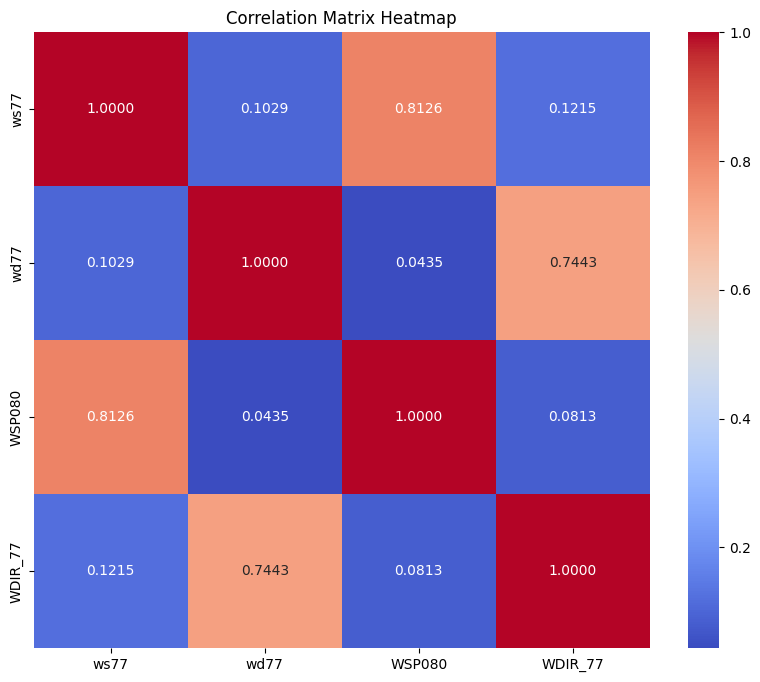

In [649]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mast_data_overlapping = mast_data_overlapping.rename(columns={'ws77_1H_mean': 'ws77'})
mast_data_overlapping = mast_data_overlapping.rename(columns={'wd77_1H_mean': 'wd77'})

# Ensure the index of mast_data_overlapping contains datetime information
mast_data_overlapping.index = pd.to_datetime(mast_data_overlapping.index, errors='coerce')

# Ensure 'TIMESTAMP' in meso_data is in datetime format
meso_data_overlapping.index = pd.to_datetime(meso_data_overlapping.index, errors='coerce')

joined_df = pd.concat([mast_data_overlapping, meso_data_overlapping[['WSP080', 'WDIR_77']]], axis=1)

joined_df.dropna(inplace=True)

joined_df.head()

# Compute the correlation matrix for the selected data
correlation_matrix = joined_df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


### Model Develpoment and Model Evalution

#### Wind Speed

In [650]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'joined_df' is the DataFrame containing wind speed and direction data

# Select features (X) and target variable (y). Adjust these based on your analysis goal.
# Example: Predicting wind speed at 77 meters using the sin/cos components and other variables.
X = joined_df[['WSP080', 'wd77', 'WDIR_77']].dropna()
y = joined_df['ws77'].dropna()

# Align X and y to ensure they have the same indices
X, y = X.align(y, join='inner', axis=0)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Cross-validation (5-fold cross-validation for better model robustness)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean Cross-validation R²: {np.mean(cv_scores)}")

Mean Squared Error (MSE): 0.003401058883883852
R-squared (R²): 0.6721043072911026
Cross-validation R² scores: [0.71286153 0.66557469 0.5268171  0.71073682 0.71588934]
Mean Cross-validation R²: 0.6663758959004369


#### Wind direction

In [651]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'joined_df' is the DataFrame containing wind speed and direction data

# Select features (X) and target variable (y). Adjust these based on your analysis goal.
# Example: Predicting wind speed at 77 meters using the sin/cos components and other variables.
X = joined_df[['ws77', 'WSP080', 'WDIR_77']].dropna()
y = joined_df['wd77'].dropna()

# Align X and y to ensure they have the same indices
X, y = X.align(y, join='inner', axis=0)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Cross-validation (5-fold cross-validation for better model robustness)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean Cross-validation R²: {np.mean(cv_scores)}")

Mean Squared Error (MSE): 0.02453010107924127
R-squared (R²): 0.5703285870656585
Cross-validation R² scores: [0.57565844 0.56057245 0.52691193 0.54009243 0.56763957]
Mean Cross-validation R²: 0.554174964868228
